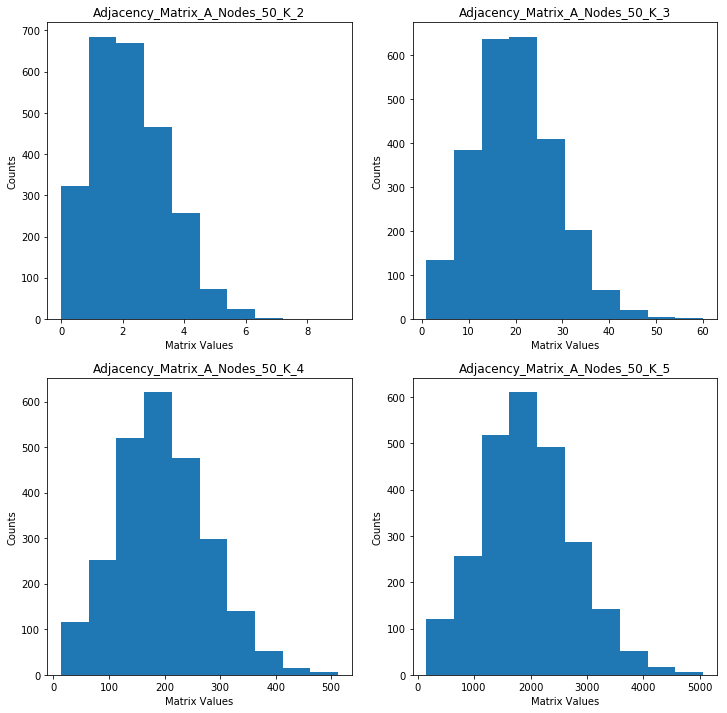

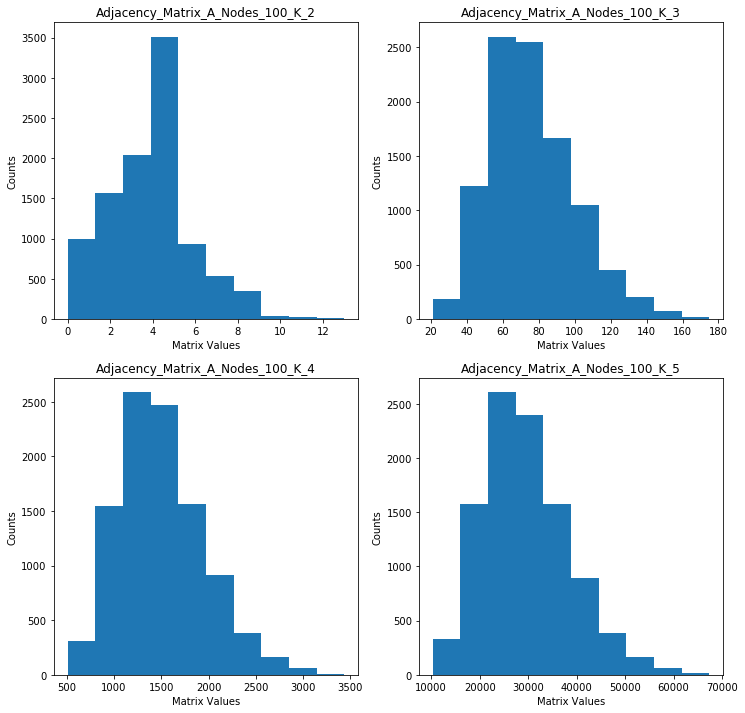

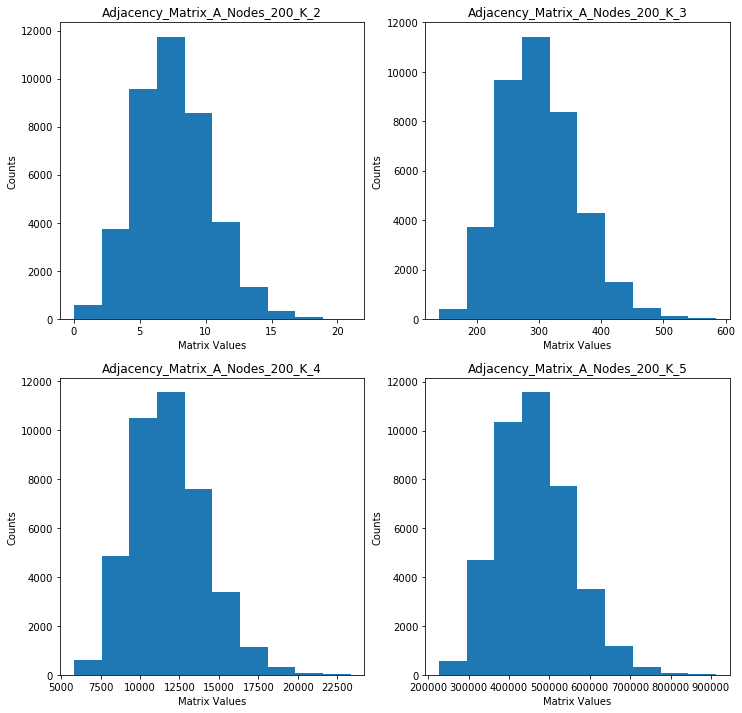

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

tau=.2
tau2=2*tau
nodes=[50,100,200]
k=5

# Matrix A for tau=.2
matrix_A=[[],[],[]]

#********************************************************************#
# Function matrix_Cre is a Graph Generator or to create matrix.      #
#                                                                    #
# Pamrs:                                                             #
#   parm1: No of nodes                                               #
#   parm2: constant tau value                                        #
#   parm3: Matrix type(A or B)                                       #
# Return:                                                            #
#   Adjacency Matrix                                                 #
#********************************************************************#

def matrix_Cre(nodes,temp_tau,matrix_type):
    temp_matrix = (np.random.random((nodes,nodes)))
    for i in range(temp_matrix.shape[1]):
        for j in range(temp_matrix.shape[1]):
            if temp_matrix[i,j] > temp_tau:
                temp_matrix[i,j]=0
            else:
                temp_matrix[i,j]=1
    np.fill_diagonal(temp_matrix, 0)
           
    file = "Adjacency_Matrix_" + str(matrix_type) + "_Nodes_" + str(nodes) + "_K_" + str(1) + ".csv"
    np.savetxt(file, np.array(temp_matrix), delimiter=',', fmt='%d', header= file)
    
    return temp_matrix

#********************************************************************#
# Function matrix_pow is used to calculate power of matrix.          #
#                                                                    #
# Pamrs:                                                             #
#   parm1: adjacency Matrix                                          #
#   parm2: power                                                     #
#   parm3: index in nodes list                                       #
#   parm3: Matrix type(A or B)                                       #
# Return:                                                            #
#   (Adjacency Matrix)^power                                         #
#********************************************************************#         
def matrix_pow(temp_matrix,power,node_index,matrix_type):
    global nodes
    matrix_out = matrix_power(temp_matrix, power)
    
    file = "Adjacency_Matrix_" + str(matrix_type) + "_Nodes_" + str(nodes[node_index]) + "_K_" + str(power) + ".csv"
    np.savetxt(file, np.array(matrix_out), delimiter=',', fmt='%d', header= file)
    
    return(matrix_out)

#********************************************************************#
# Function plot_hist is used to plot histogram matrix.               #
#                                                                    #
# Pamrs:                                                             #
#   parm1: adjacency Matrix                                          #
#   parm2: rows in subplot                                           #
#   parm3: no of subplots in 1 row of of plot                        #
#   parm3: index in nodes list                                       #
#********************************************************************#
def plot_hist(temp_matrix,rows,cols,node_index):
    global nodes
    fig, plots = plt.subplots(rows,cols,figsize=(12,12))
    for i in range(rows):
        for j in range(cols):
            index=2*i+j+1
            #print(index)
            plots[i,j].set_xlabel('Matrix Values')
            plots[i,j].set_ylabel('Counts')
            title="Adjacency_Matrix_A_Nodes_" + str(nodes[node_index]) + "_K_" + str(index+1)
            plots[i,j].set_title(title)
            plots[i,j].hist(temp_matrix[index].ravel())
    plt.show()
    figure_name = "Adjacency_Matrix_A_Nodes_" + str(nodes[node_index])  + ".png"
    fig.savefig(figure_name)

# Create matrices and also calculates its power    
for i in range(len(nodes)):
    matrix_A[i].append(matrix_Cre(nodes[i],tau,'A'))   #Calls matrix_Cre for every node type
    for j in range(2,k+1):
        matrix_A[i].append(matrix_pow(matrix_A[i][0],j,i,'A'))  #Calculate power

#Plot Histograms and save the figures
for i in range(3):
    plot_hist(matrix_A[i],2,2,i)
  


# Task2

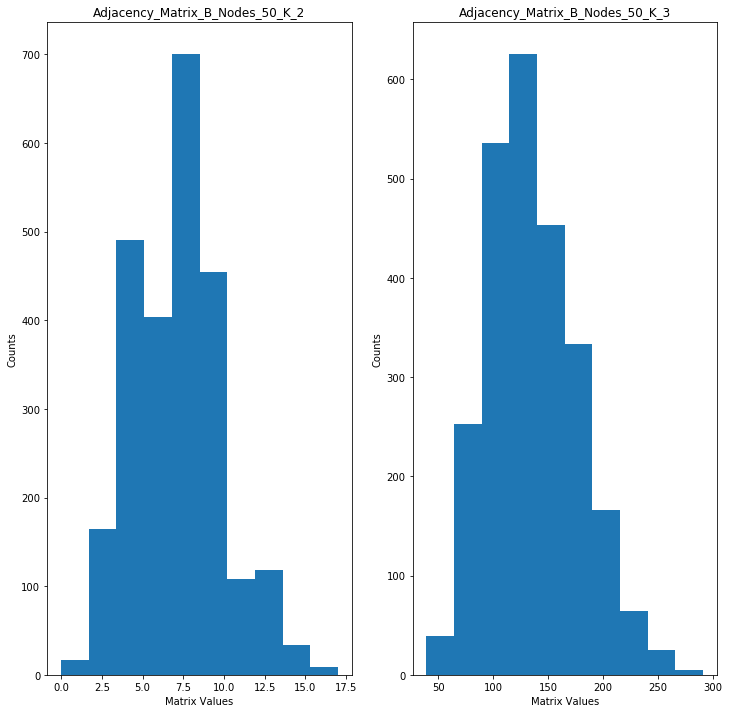

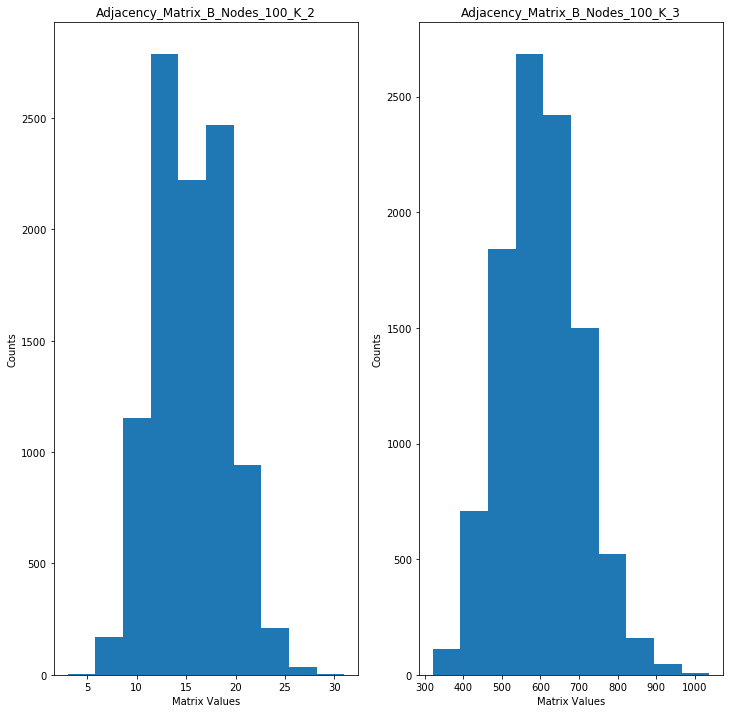

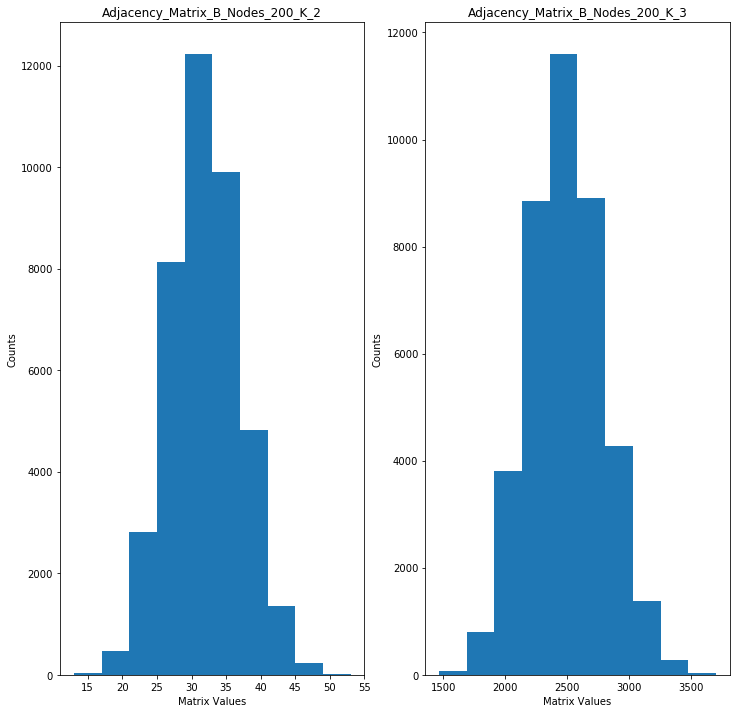

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

tau=.2
tau2=2*tau
nodes=[50,100,200]
k=3
matrix_B=[[],[],[]]

#********************************************************************#
# Function plot_hist2 is used to plot histogram matrix.              #
#                                                                    #
# Pamrs:                                                             #
#   parm1: adjacency Matrix                                          #
#   parm2: no of subplots in 1 row of of plot                        #
#   parm3: index in nodes list                                       #
#********************************************************************#
def plot_hist2(temp_matrix,cols,node_index):
    global nodes
    fig, plots = plt.subplots(1,cols,figsize=(12,12))
    for j in range(cols):
        index=j+1
        plots[j].set_xlabel('Matrix Values')
        plots[j].set_ylabel('Counts')
        title="Adjacency_Matrix_B_Nodes_" + str(nodes[node_index]) + "_K_" + str(index+1)
        plots[j].set_title(title)
        plots[j].hist(temp_matrix[index].ravel())
    plt.show()
    figure_name = "Adjacency_Matrix_B_Nodes_" + str(nodes[node_index])  + ".png"
    fig.savefig(figure_name)
    
# Create matrices B and also calculates it power  
for i in range(3):
    matrix_B[i].append(matrix_Cre(nodes[i],tau2,'B'))
    for j in range(2,k+1):
        matrix_B[i].append(matrix_pow(matrix_B[i][0],j,i,'B'))  #Calculate power    
        
#Plot Histograms
for i in range(3):
    plot_hist2(matrix_B[i],2,i) 
    

# Task3

[502, 2236, 2500, 2500, 2500]
[1956, 9829, 10000, 10000, 10000]
[7827, 39986, 40000, 40000, 40000]


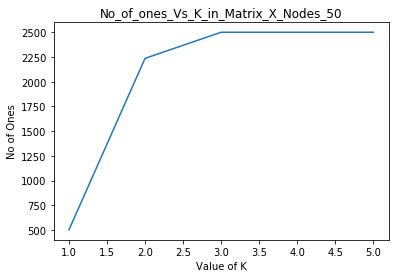

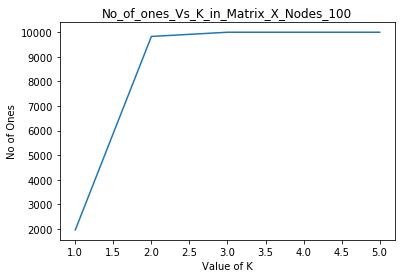

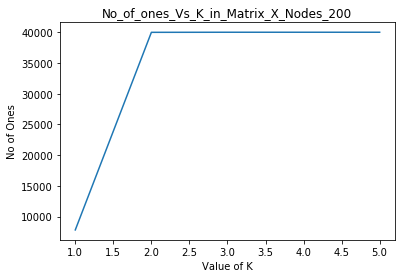

In [21]:
k=5
nodes=[50,100,200]
matrix_X=[[],[],[]]

#********************************************************************#
# Function logic_Or is used to perform logical Or operation between  #
# matrix_X^(k-1) and Matrix_A^k. Matrix_A is with only 1's here as   #
# Non-zero values have been replaced by 1's                                                                   
#                                                                    #
# Pamrs:                                                             #
#   parm1: Matrix_X^(k-1)                                            #
#   parm2: Matrix_A^(k)                                              #
#   parm3: index in nodes list                                       #
#   parm4: k value                                                   #
#********************************************************************#  
def logic_Or(temp_matrix_X,temp_matrix_A,index,power):
    temp_matrix_x_next=np.logical_or(temp_matrix_X,temp_matrix_A)
    
    file = "Adjacency_Matrix_X_Nodes_" + str(nodes[index]) + "_K_" + str(power) + ".csv"
    np.savetxt(file, np.array(temp_matrix_x_next), delimiter=',', fmt='%d', header= file)
    
    return(temp_matrix_x_next)

# Replace on Non-Zeroes values in all 12 A matrices
for i in range(3):
    for j in range(1,k):
        matrix_A[i][j][matrix_A[i][j] > 0] = 1

# Define X^1 Matrices for nodes 50, 100 and 200
for i in range(3):
    matrix_X[i].append(matrix_A[i][0])
    
# Call logic_Or to do logical OR operations on all X matrices with nodes 50, 100 and 200.
for i in range(3):
        for j in range(1,k):
            matrix_X[i].append(logic_Or(matrix_X[i][j-1],matrix_A[i][j],i,j+1))

no_of_ones=[[],[],[]]
for i in range(3):
    for j in range(k):
        temp=matrix_X[i][j].ravel()
        no_of_ones[i].append(len(temp[temp==True]))
    print(no_of_ones[i]) 

for i in range(3):
    plt.xlabel('Value of K')
    plt.ylabel('No of Ones')
    plt.title("No_of_ones_Vs_K_in_Matrix_X_Nodes_" + str(nodes[i]))
    plt.plot([1,2,3,4,5],no_of_ones[i])
    figure_name = "No_of_Ones_in_Matrix_X_Nodes_" + str(nodes[i])  + ".png"
    plt.savefig(figure_name)
    plt.show()
    
    